# Objective

* Build a Model which identify the bad customer for loan disburement
* Yes = loan Reject ( Bad Customers ) , No =loan approved ( Good  Customers )

In [1]:
################# Data Analysis & Calculation #################
import numpy as np
import pandas as pd

import os

################# ignore Warning #################
import warnings
warnings.filterwarnings("ignore")

################# visualization #################
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Importing

In [2]:
Airline = pd.read_csv (r"C:\Users\sansk\Downloads\Machine Learning projects\Airline\Invistico_Airline.csv")
Airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat_Comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online_boarding,Departure_Delay_Minutes,Arrival_Delay_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [85]:
Airline.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat_Comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_Minutes', 'Arrival_Delay_Minutes'],
      dtype='object')

# 2. Data Pre-Processing

1. Data Type and conversion
2. Identifying & Treatment Missing Value

#### 2.1. Data Type and conversion

In [3]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat_Comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

#### 2.2. Identifying & Treatment Missing Value

In [4]:
Airline.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat_Comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_Minutes                0
Arrival_Delay_Minutes                393
dtype: int64

In [5]:
Airline = Airline.dropna()


In [6]:
Airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat_Comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online_boarding,Departure_Delay_Minutes,Arrival_Delay_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [7]:
Airline.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat_Comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online_boarding                      0
Departure_Delay_Minutes              0
Arrival_Delay_Minutes                0
dtype: int64

In [8]:
Airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat_Comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online_boarding,Departure_Delay_Minutes,Arrival_Delay_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


<Axes: >

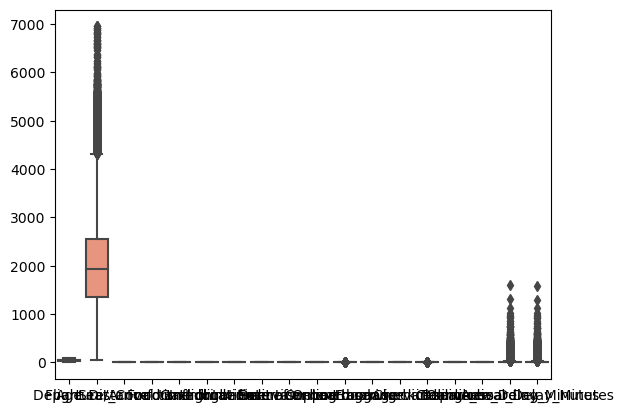

In [9]:
sns.boxplot(data=Airline)

In [10]:
for i in Airline:                  # i = column name 
    if Airline[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = Airline[i].quantile(0.25)  # for 1 column compute q1
        q3 = Airline[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        Airline[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

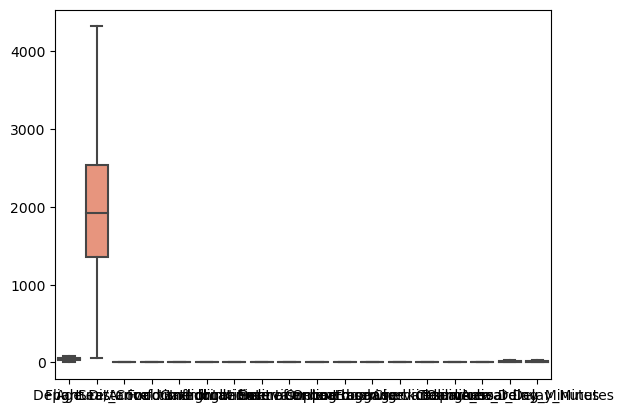

In [11]:
sns.boxplot(data=Airline)

# 4. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable



In [12]:
Airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat_Comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online_boarding,Departure_Delay_Minutes,Arrival_Delay_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3.0,0,3,5.0,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4.0,4,4,2.0,3,2,30,32.5
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3.0,3,4,4.0,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1.5,0,1,4.0,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2.0,0,2,4.0,2,5,0,0.0


In [13]:
Quantitative_Variable = Airline.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

,Age,Flight Distance,Seat_Comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online_boarding,Departure_Delay_Minutes,Arrival_Delay_Minutes
0,65,265,0,0,0,2,2,4,2,3,3.0,0,3,5.0,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4.0,4,4,2.0,3,2,30,32.5
2,15,2138,0,0,0,3,2,0,2,2,3.0,3,4,4.0,4,2,0,0.0


In [14]:
Qualitative_Variable = Airline.select_dtypes(include=['object'])
Qualitative_Variable.head(3)

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco


### Converting qualitative Variable into number

In [15]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head(3)

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,1,0,0,1,1
1,1,1,0,1,0
2,1,0,0,1,1


In [83]:
df.columns()

TypeError: 'Index' object is not callable

## Combining the data set

# 5. Data Partition

In [17]:
X = df.drop('satisfaction', axis= 1)
y = df[['satisfaction']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [78]:
X_test

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes
21132,2005,3,3,10,27.0
21182,511,3,5,1,0.0
36365,969,4,0,0,0.0
123296,461,3,4,0,0.0
35548,50,4,5,0,0.0
...,...,...,...,...,...
62854,2886,5,5,8,3.0
125981,795,3,4,20,13.0
93960,53,4,4,0,0.0
1411,1003,1,1,0,0.0


In [18]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Age,Flight Distance,Seat_Comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online_boarding,Departure_Delay_Minutes,Arrival_Delay_Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
76815,80,464,2,1,3,1,5,4,4,2,...,1.5,2,1,10,6.0,1,0,0,0,0
91576,36,533,5,5,5,5,3,1,4,4,...,2.0,4,5,30,32.5,1,0,0,0,1
15265,38,1314,4,1,1,1,1,4,3,4,...,2.0,4,2,9,0.0,0,0,1,1,1
94906,57,3646,3,4,3,3,3,5,5,4,...,5.0,4,5,30,17.0,1,0,0,0,1
12055,51,1454,2,4,1,1,4,1,4,4,...,2.0,3,4,0,0.0,1,0,1,1,0


# Model building

# Logistics Regression

In [19]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy')
Model3.fit(X_train,y_train)  # fit = apply

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [20]:
Model3.feature_names_in_

array(['Age', 'Flight Distance', 'Seat_Comfort',
       'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online_boarding', 'Departure_Delay_Minutes',
       'Arrival_Delay_Minutes', 'Gender', 'Customer Type',
       'Type of Travel', 'Class'], dtype=object)

In [21]:
Model3.get_feature_names_out()

array(['Flight Distance', 'Seat_Comfort', 'Inflight entertainment',
       'Departure_Delay_Minutes', 'Arrival_Delay_Minutes'], dtype=object)

In [22]:
X_train = X_train.loc[:,['Flight Distance', 'Seat_Comfort', 'Inflight entertainment',
       'Departure_Delay_Minutes', 'Arrival_Delay_Minutes']]
X_train.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes
76815,464,2,4,10,6.0
91576,533,5,1,30,32.5
15265,1314,4,4,9,0.0
94906,3646,3,5,30,17.0
12055,1454,2,1,0,0.0


In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output

In [24]:
output.intercept_  # beto

array([-3.02975859])

In [25]:
output.coef_  # Beta 1 --

array([[-8.37399684e-05,  5.34327426e-02,  9.99050106e-01,
         5.11075102e-03, -2.27513706e-02]])

In [26]:
output.feature_names_in_

array(['Flight Distance', 'Seat_Comfort', 'Inflight entertainment',
       'Departure_Delay_Minutes', 'Arrival_Delay_Minutes'], dtype=object)

# Step 6 : Predictions on Train Dataset

In [27]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction
76815,464,2,4,10,6.0,0
91576,533,5,1,30,32.5,1
15265,1314,4,4,9,0.0,1
94906,3646,3,5,30,17.0,1
12055,1454,2,1,0,0.0,0


train['Predicted']=output.predict(X_train)
train.head()

In [28]:
train['Probability_Bad']= output.predict_proba(X_train)[:,1]  # [Row , column]
train.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction,Probability_Bad
76815,464,2,4,10,6.0,0,0.720924
91576,533,5,1,30,32.5,1,0.083610
15265,1314,4,4,9,0.0,1,0.753271
94906,3646,3,5,30,17.0,1,0.830197
12055,1454,2,1,0,0.0,0,0.114498


In [29]:
train['Predicted'] = np.where(train['Probability_Bad'] >= 0.7,1,0)
train.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction,Probability_Bad,Predicted
76815,464,2,4,10,6.0,0,0.720924,1
91576,533,5,1,30,32.5,1,0.083610,0
15265,1314,4,4,9,0.0,1,0.753271,1
94906,3646,3,5,30,17.0,1,0.830197,1
12055,1454,2,1,0,0.0,0,0.114498,0


# Step 7 : Model Performance Metrics

In [30]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['satisfaction'])
matrix

array([[35012, 16555],
       [ 5976, 33097]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(train['satisfaction'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76     40988
           1       0.85      0.67      0.75     49652

    accuracy                           0.75     90640
   macro avg       0.76      0.76      0.75     90640
weighted avg       0.77      0.75      0.75     90640



* Accuracy of  Model is 75%,Hence Model is good Fit
* Accuracy of Bad Customer Capture by Model is 67% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 85% (Specificity)

# Step 8 : Predictions on Test Dataset

In [32]:
X_test = X_test.loc[:,['Flight Distance', 'Seat_Comfort', 'Inflight entertainment',
       'Departure_Delay_Minutes', 'Arrival_Delay_Minutes']]
X_test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes
21132,2005,3,3,10,27.0
21182,511,3,5,1,0.0
36365,969,4,0,0,0.0
123296,461,3,4,0,0.0
35548,50,4,5,0,0.0


In [33]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction
21132,2005,3,3,10,27.0,0
21182,511,3,5,1,0.0,1
36365,969,4,0,0,0.0,0
123296,461,3,4,0,0.0,1
35548,50,4,5,0,0.0,0


In [34]:
test['Probability_Bad'] = output.predict_proba(X_test)[:,1]
test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction,Probability_Bad
21132,2005,3,3,10,27.0,0,0.353569
21182,511,3,5,1,0.0,1,0.889742
36365,969,4,0,0,0.0,0,0.052294
123296,461,3,4,0,0.0,1,0.748031
35548,50,4,5,0,0.0,0,0.897985


In [35]:
test['Predicted'] = np.where(test['Probability_Bad'] >= 0.7,1,0)
test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction,Probability_Bad,Predicted
21132,2005,3,3,10,27.0,0,0.353569,0
21182,511,3,5,1,0.0,1,0.889742,1
36365,969,4,0,0,0.0,0,0.052294,0
123296,461,3,4,0,0.0,1,0.748031,1
35548,50,4,5,0,0.0,0,0.897985,1


# Step 9 : Model Performance Metrics on Test data

In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['satisfaction'])
print(matrix)

[[15064  7149]
 [ 2553 14081]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(test['satisfaction'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76     17617
           1       0.85      0.66      0.74     21230

    accuracy                           0.75     38847
   macro avg       0.76      0.76      0.75     38847
weighted avg       0.77      0.75      0.75     38847



* Accuracy of  Model is 75%,Hence Model Performance is good Fit on test Data
* Accuracy of Bad Customer Capture by Model is 66% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 86%

# Decision Tree


## Model Building

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

##  Plotting Tree

In [39]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,satisfaction,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes
76815,0,464,2,4,10,6.0
91576,1,533,5,1,30,32.5
15265,1,1314,4,4,9,0.0
94906,1,3646,3,5,30,17.0
12055,0,1454,2,1,0,0.0


In [40]:
independent_variable = list(train.columns[1:])
independent_variable

['Flight Distance',
 'Seat_Comfort',
 'Inflight entertainment',
 'Departure_Delay_Minutes',
 'Arrival_Delay_Minutes']

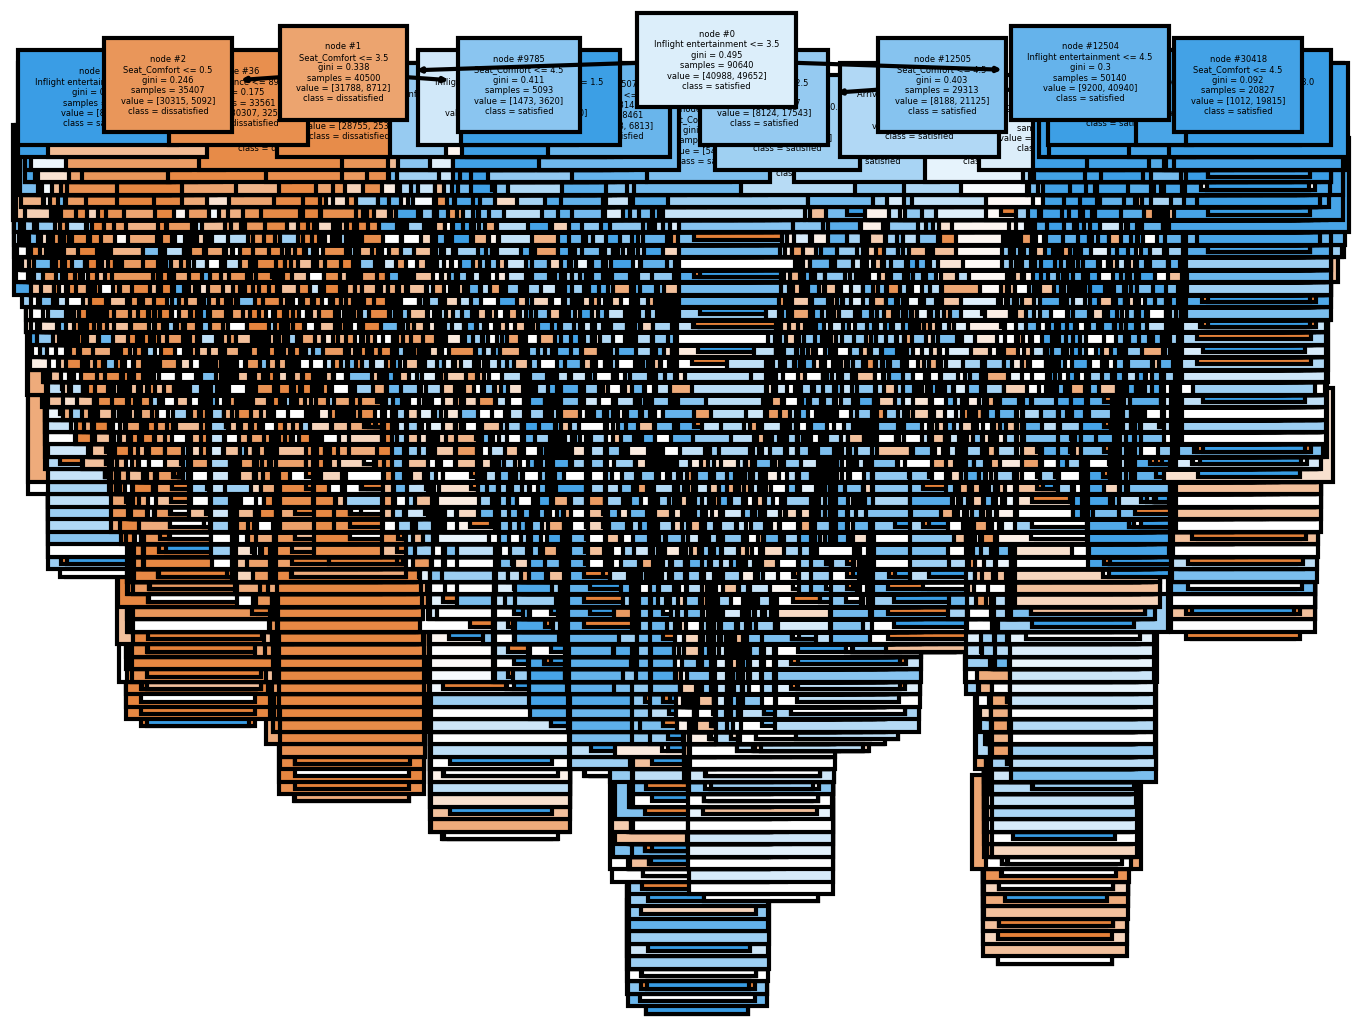

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

satisfaction = ['dissatisfied', 'satisfied']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
plot_tree(dt,  # Model
               feature_names = independent_variable,  # column name
               class_names = satisfaction, 
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); #
#fig.savefig('imagename.png')

###  Prediction on Train dataset

In [42]:
train.head()

,satisfaction,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes
76815,0,464,2,4,10,6.0
91576,1,533,5,1,30,32.5
15265,1,1314,4,4,9,0.0
94906,1,3646,3,5,30,17.0
12055,0,1454,2,1,0,0.0


In [43]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,satisfaction,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,Predicted
76815,0,464,2,4,10,6.0,0
91576,1,533,5,1,30,32.5,1
15265,1,1314,4,4,9,0.0,1
94906,1,3646,3,5,30,17.0,1
12055,0,1454,2,1,0,0.0,0


###  Model Performance Metrics

In [44]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['satisfaction'])
print(matrix)

[[40267  2017]
 [  721 47635]]


In [45]:
Accuracy_Train=((46862+56834)/(103904)*100)
print(Accuracy_Train) 

99.79981521404373


In [46]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     40988
           1       0.99      0.96      0.97     49652

    accuracy                           0.97     90640
   macro avg       0.97      0.97      0.97     90640
weighted avg       0.97      0.97      0.97     90640



* Model is overfitting , So we need control overfitting by doing pruning

###  Model Improvement by Pruning Method [ Cut Tree]

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=100, ## child
                                 min_samples_split=150, #parent
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=150)

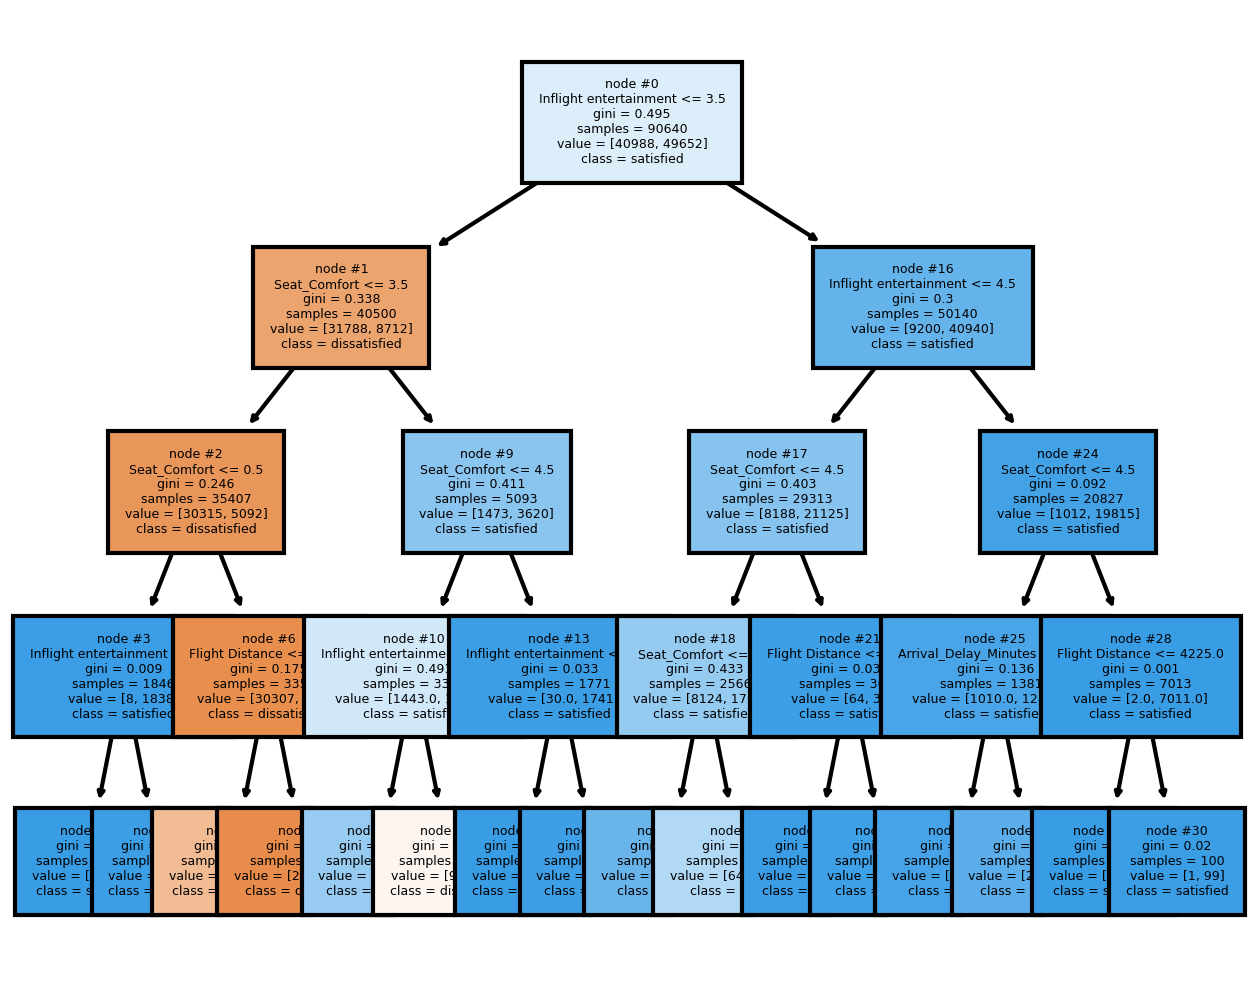

In [49]:
from sklearn import tree
import matplotlib.pyplot as plt

satisfaction=['dissatisfied', 'satisfied']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model
               feature_names = independent_variable,  # column name
               class_names = satisfaction, 
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3);

### Final accuracy of Model after Pruning

#### Prediction on Train Dataset

In [50]:
train.head()

,satisfaction,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,Predicted
76815,0,464,2,4,10,6.0,0
91576,1,533,5,1,30,32.5,1
15265,1,1314,4,4,9,0.0,1
94906,1,3646,3,5,30,17.0,1
12055,0,1454,2,1,0,0.0,0


In [51]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,satisfaction,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,Predicted
76815,0,464,2,4,10,6.0,1
91576,1,533,5,1,30,32.5,1
15265,1,1314,4,4,9,0.0,1
94906,1,3646,3,5,30,17.0,1
12055,0,1454,2,1,0,0.0,0


In [53]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['satisfaction'])
print(matrix)

[[31291  4162]
 [ 9697 45490]]


In [54]:
Accuracy_Train=((36022+52157)/(103904)*100)
print(Accuracy_Train)

84.86583769633508


In [55]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     40988
           1       0.82      0.92      0.87     49652

    accuracy                           0.85     90640
   macro avg       0.85      0.84      0.84     90640
weighted avg       0.85      0.85      0.85     90640



#### Predictions on Test Dataset

In [56]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction
21132,2005,3,3,10,27.0,0
21182,511,3,5,1,0.0,1
36365,969,4,0,0,0.0,0
123296,461,3,4,0,0.0,1
35548,50,4,5,0,0.0,0


In [57]:
test['Predicted'] = dt.predict(X_test)
test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction,Predicted
21132,2005,3,3,10,27.0,0,0
21182,511,3,5,1,0.0,1,1
36365,969,4,0,0,0.0,0,1
123296,461,3,4,0,0.0,1,1
35548,50,4,5,0,0.0,0,1


#### Model Performance Metrics on Test data

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['satisfaction'])
print(confusion_matrix)

[[13472  1831]
 [ 4145 19399]]


In [59]:
Accuracy_test=((9081+12779)/(25976)*100)
Accuracy_test

84.15460425007699

## Train

In [60]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     40988
           1       0.82      0.92      0.87     49652

    accuracy                           0.85     90640
   macro avg       0.85      0.84      0.84     90640
weighted avg       0.85      0.85      0.85     90640



## Test

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test['satisfaction'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     17617
           1       0.82      0.91      0.87     21230

    accuracy                           0.85     38847
   macro avg       0.85      0.84      0.84     38847
weighted avg       0.85      0.85      0.84     38847



# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(random_state=20,
                               n_estimators=25, 
                               criterion="gini",
                               max_depth=3,  
                               min_samples_split=80,
                               min_samples_leaf=40,
                               max_features="sqrt")

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=80,
                       n_estimators=25, random_state=20)

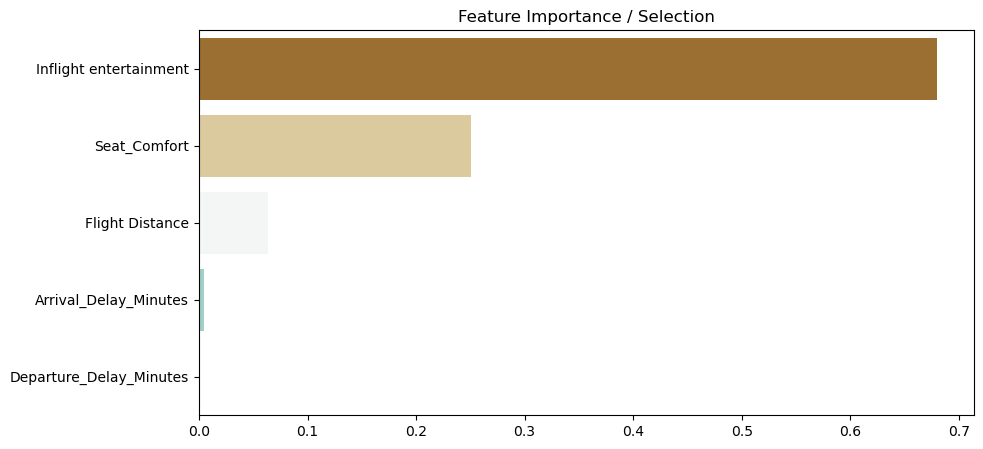

In [63]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')

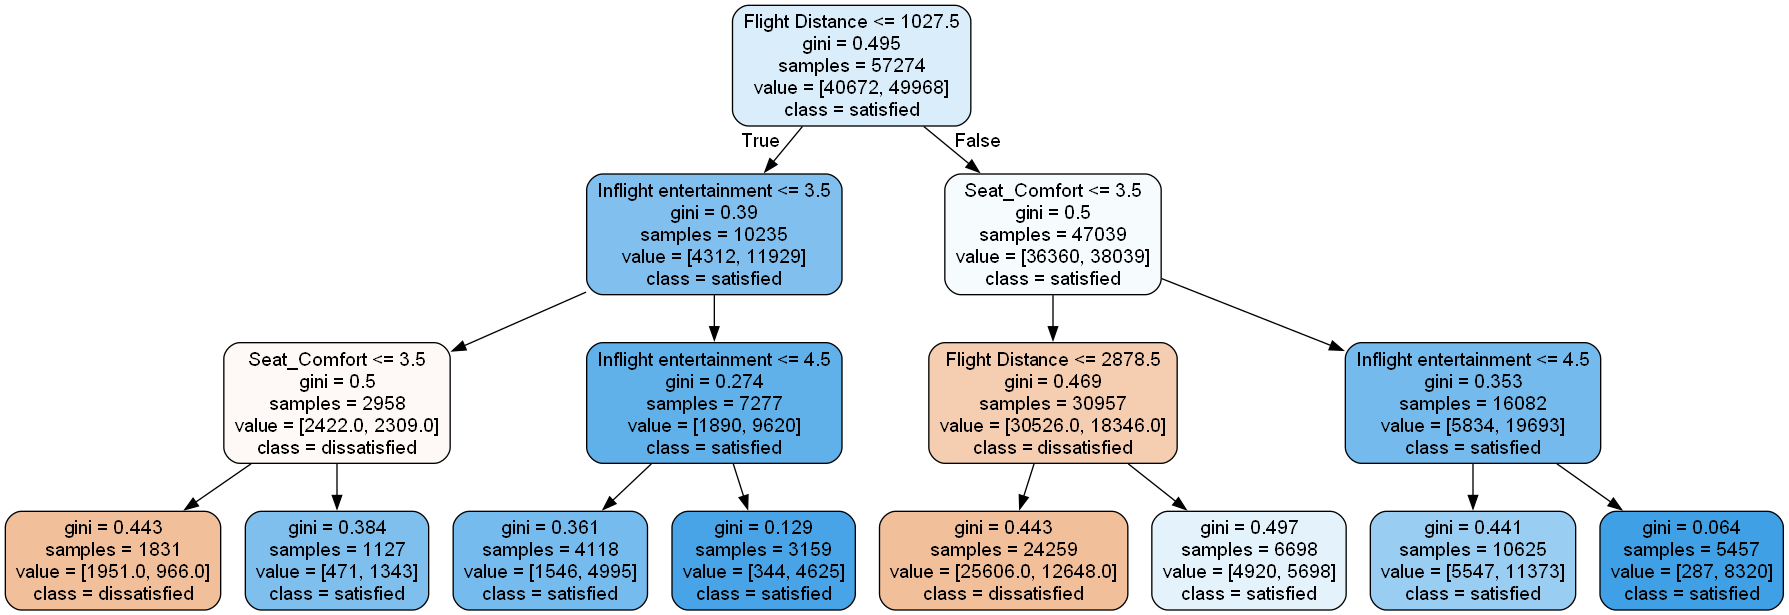

In [64]:
from sklearn.tree import export_graphviz
import pydot

feature_list = independent_variable  
satisfaction=['dissatisfied', 'satisfied']   

tree = Model.estimators_[2]  

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = independent_variable, 
                class_names = satisfaction,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

### Predictions on Train Dataset

In [65]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction
76815,464,2,4,10,6.0,0
91576,533,5,1,30,32.5,1
15265,1314,4,4,9,0.0,1
94906,3646,3,5,30,17.0,1
12055,1454,2,1,0,0.0,0


In [66]:
train['Predicted'] = Model.predict(X_train)
train.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction,Predicted
76815,464,2,4,10,6.0,0,1
91576,533,5,1,30,32.5,1,1
15265,1314,4,4,9,0.0,1,1
94906,3646,3,5,30,17.0,1,1
12055,1454,2,1,0,0.0,0,0


### Model Performance Metrics Train Dataset

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['satisfaction'])
print(confusion_matrix)

[[31320  4889]
 [ 9668 44763]]


In [68]:
Accuracy_Train=((36412+50587)/(103904)*100)
print(Accuracy_Train)

83.73017400677548


In [69]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81     40988
           1       0.82      0.90      0.86     49652

    accuracy                           0.84     90640
   macro avg       0.84      0.83      0.84     90640
weighted avg       0.84      0.84      0.84     90640



## Predictions on Test Dataset

In [70]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction
21132,2005,3,3,10,27.0,0
21182,511,3,5,1,0.0,1
36365,969,4,0,0,0.0,0
123296,461,3,4,0,0.0,1
35548,50,4,5,0,0.0,0


In [71]:
test['Predicted'] = Model.predict(X_test)
test.head()

,Flight Distance,Seat_Comfort,Inflight entertainment,Departure_Delay_Minutes,Arrival_Delay_Minutes,satisfaction,Predicted
21132,2005,3,3,10,27.0,0,0
21182,511,3,5,1,0.0,1,1
36365,969,4,0,0,0.0,0,1
123296,461,3,4,0,0.0,1,1
35548,50,4,5,0,0.0,0,1


### Model Performance Metrics on Test data

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['satisfaction'])
print(confusion_matrix)

[[13502  2187]
 [ 4115 19043]]


In [73]:
Accuracy_test=((9181+12383)/(25976)*100)
Accuracy_test

83.01509085309516

In [74]:
from sklearn.metrics import classification_report
print(classification_report(test['satisfaction'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     17617
           1       0.82      0.90      0.86     21230

    accuracy                           0.84     38847
   macro avg       0.84      0.83      0.83     38847
weighted avg       0.84      0.84      0.84     38847



In [75]:
import pickle

In [76]:

pickle.dump(dt, open(r'C:\Users\sansk\Downloads\Machine Learning projects\Airline\Model.pkl','wb'))